<a href="https://colab.research.google.com/github/SouparnaChatterjee/Meta-AIML/blob/main/MiniProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset and reading the 5 rows
data=pd.read_csv("Telecom_customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:

#to obtain shape and dimensions of dataset
data.shape

(7043, 21)

In [4]:

#statistical description of data
data.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


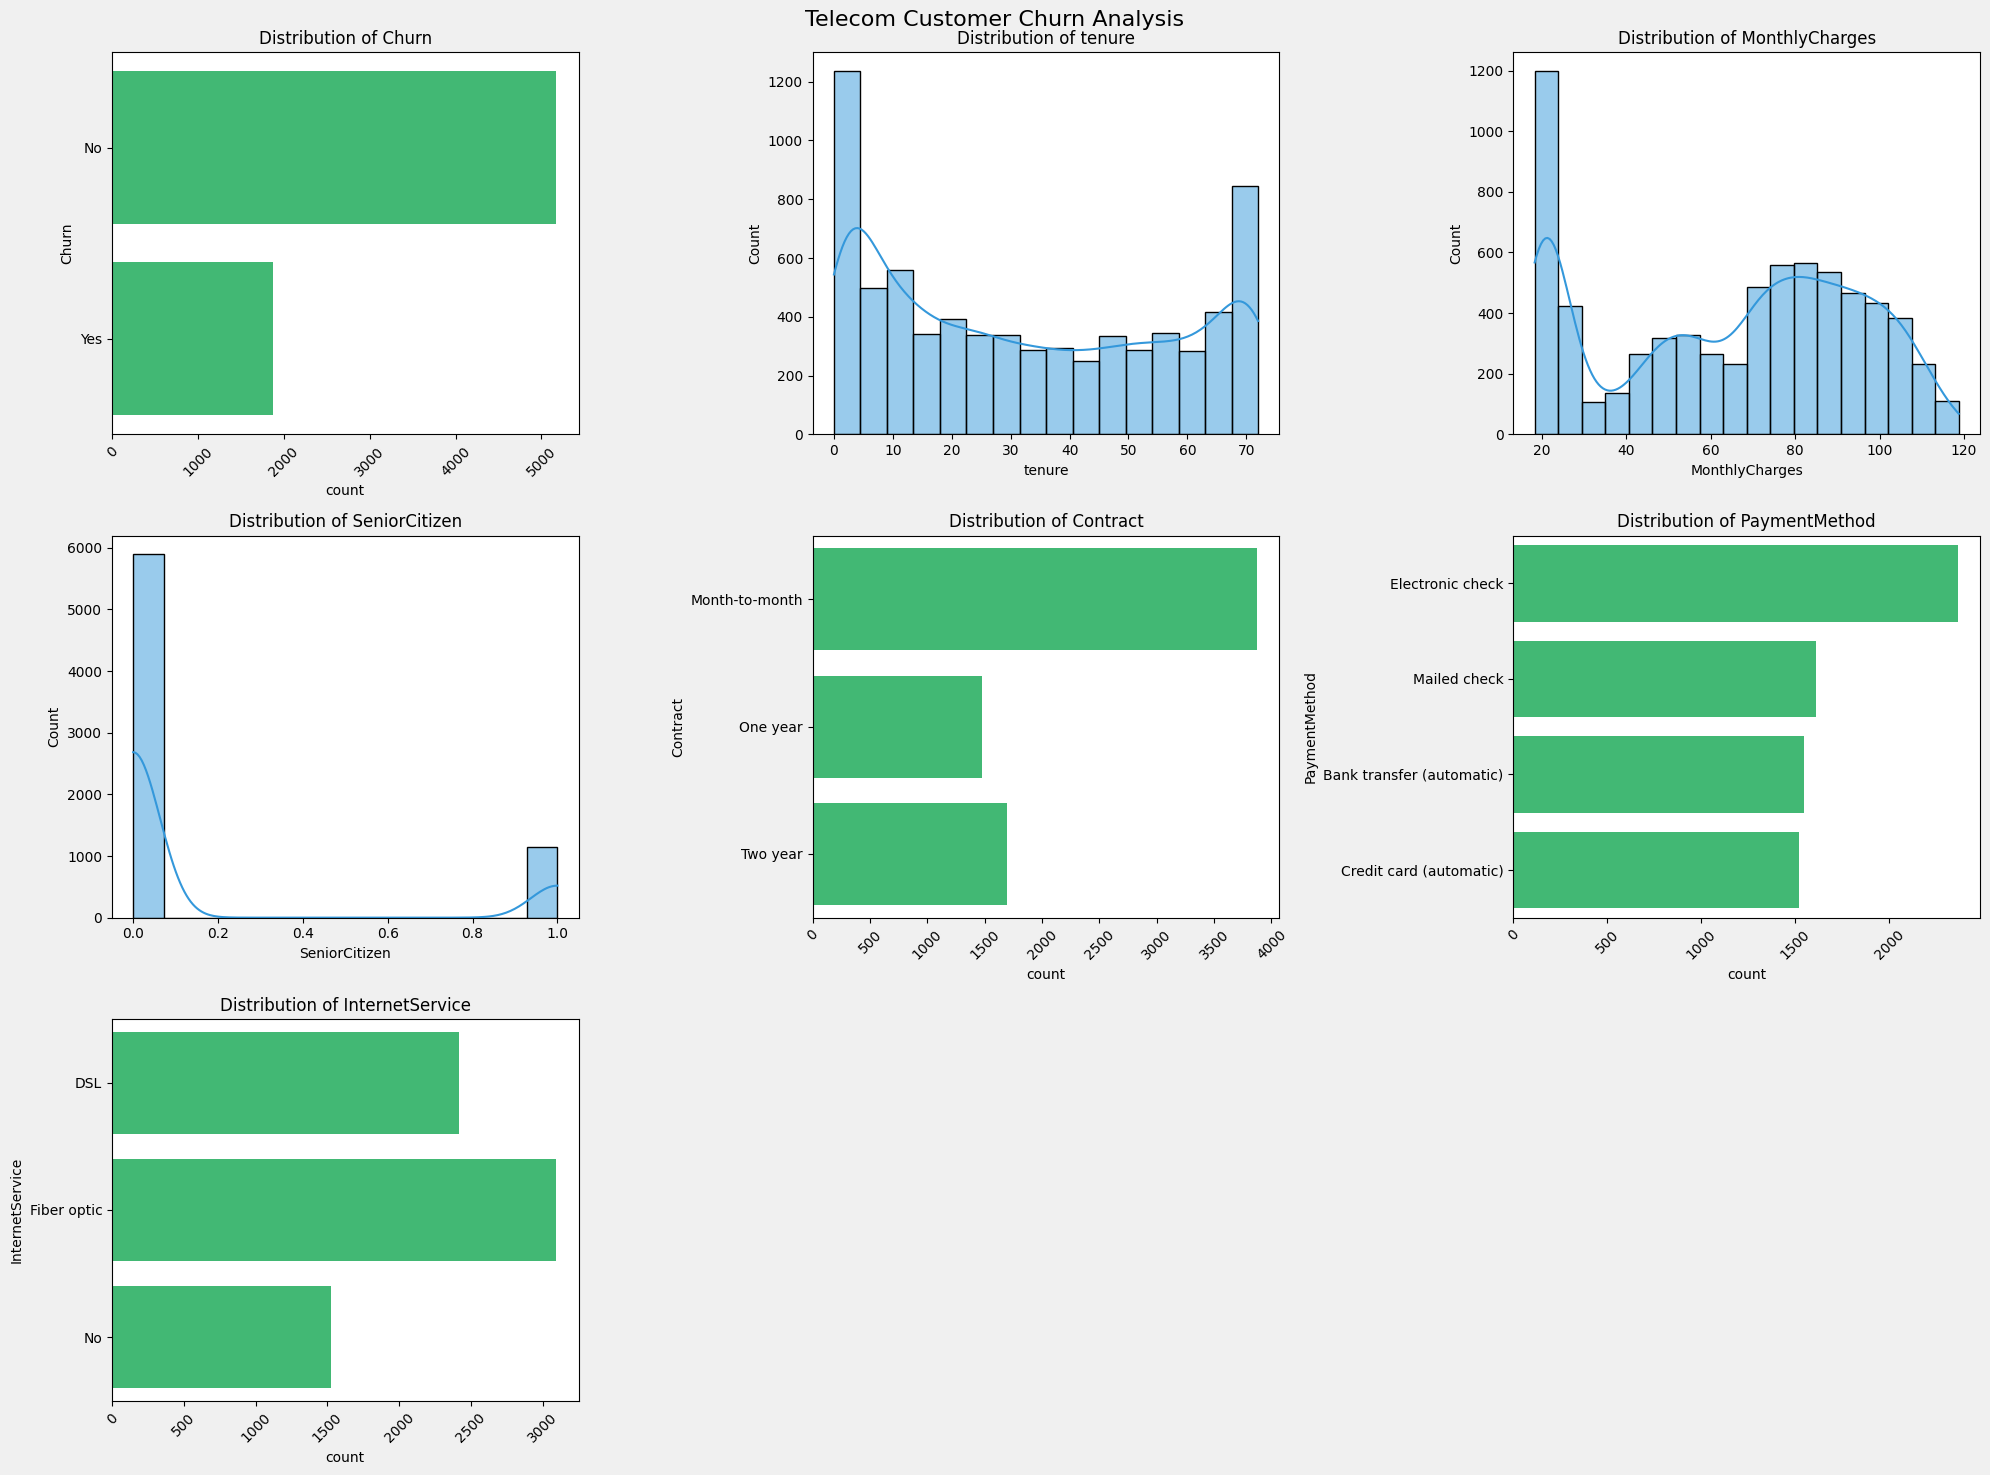

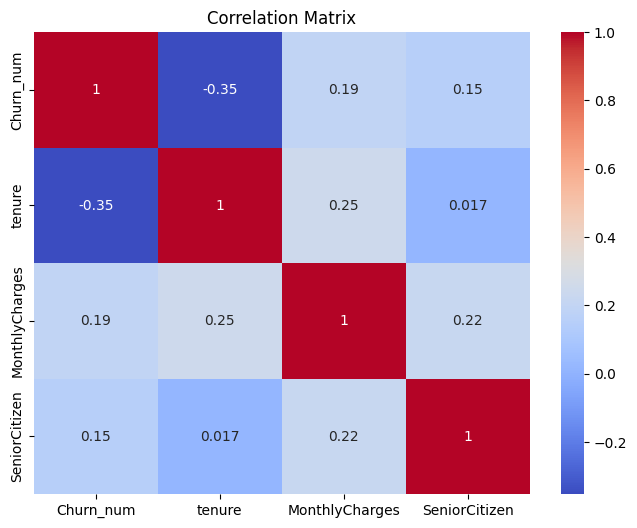

In [7]:
# Concise visualization code for churn analysis
plt.figure(figsize=(20, 15), facecolor='#f0f0f0')

# Key columns for churn analysis
key_columns = ['Churn', 'tenure', 'MonthlyCharges', 'SeniorCitizen',
               'Contract', 'PaymentMethod', 'InternetService']

# Plot distributions
for i, col in enumerate(key_columns, 1):
    plt.subplot(3, 3, i)
    if data[col].dtype in ['int64', 'float64']:
        sns.histplot(data[col], kde=True, color='#3498db')
    else:
        sns.countplot(data[col], color='#2ecc71')
        plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')

plt.suptitle('Telecom Customer Churn Analysis', fontsize=16)
plt.tight_layout()
plt.show()

# Convert Churn to numerical (0/1)
data['Churn_num'] = (data['Churn'] == 'Yes').astype(int)

# we will build a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Churn_num', 'tenure', 'MonthlyCharges', 'SeniorCitizen']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
import pandas as pd
import numpy as np

# Load and clean data
data = pd.read_csv("Telecom_customer_churn.csv")

# Handle missing values efficiently
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Quick cleaning
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Convert Churn to numeric
data['Churn'] = (data['Churn'] == 'Yes').astype(int)

# Basic stats
print("Dataset Shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
print("\nChurn Rate:", data['Churn'].mean()*100, "%")

# Save cleaned data
data.to_csv('telecom_cleaned.csv', index=False)

Dataset Shape: (7043, 21)

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Churn Rate: 26.536987079369588 %


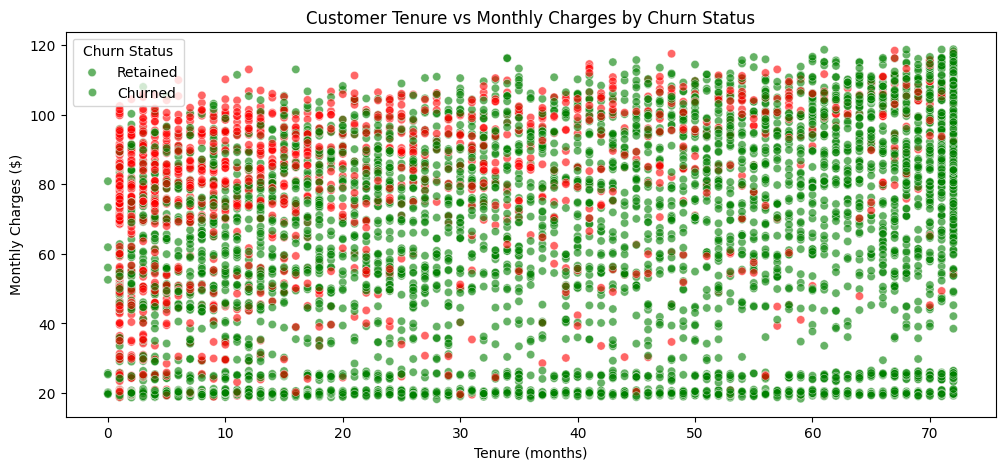

In [9]:
# Scatter plot for customer behavior patterns
plt.figure(figsize=(12, 5))
sns.scatterplot(data=data,
                x='tenure',
                y='MonthlyCharges',
                hue='Churn',
                palette=['green', 'red'],
                alpha=0.6)
plt.title('Customer Tenure vs Monthly Charges by Churn Status')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn Status', labels=['Retained', 'Churned'])
plt.show()

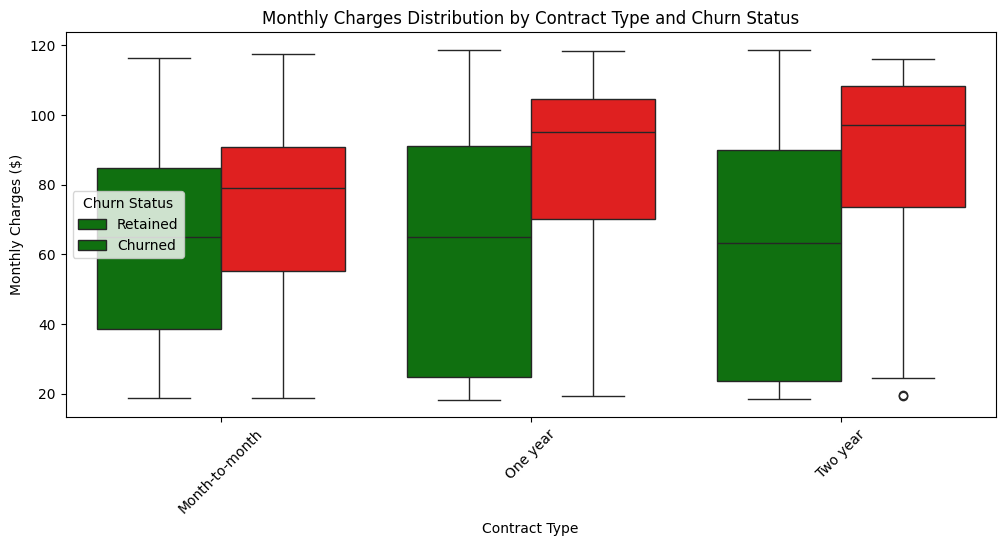

In [10]:
# Box plots for customer charges across different contract types
plt.figure(figsize=(12, 5))
sns.boxplot(data=data,
            x='Contract',
            y='MonthlyCharges',
            hue='Churn',
            palette=['green', 'red'])
plt.title('Monthly Charges Distribution by Contract Type and Churn Status')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges ($)')
plt.xticks(rotation=45)
plt.legend(title='Churn Status', labels=['Retained', 'Churned'])
plt.show()

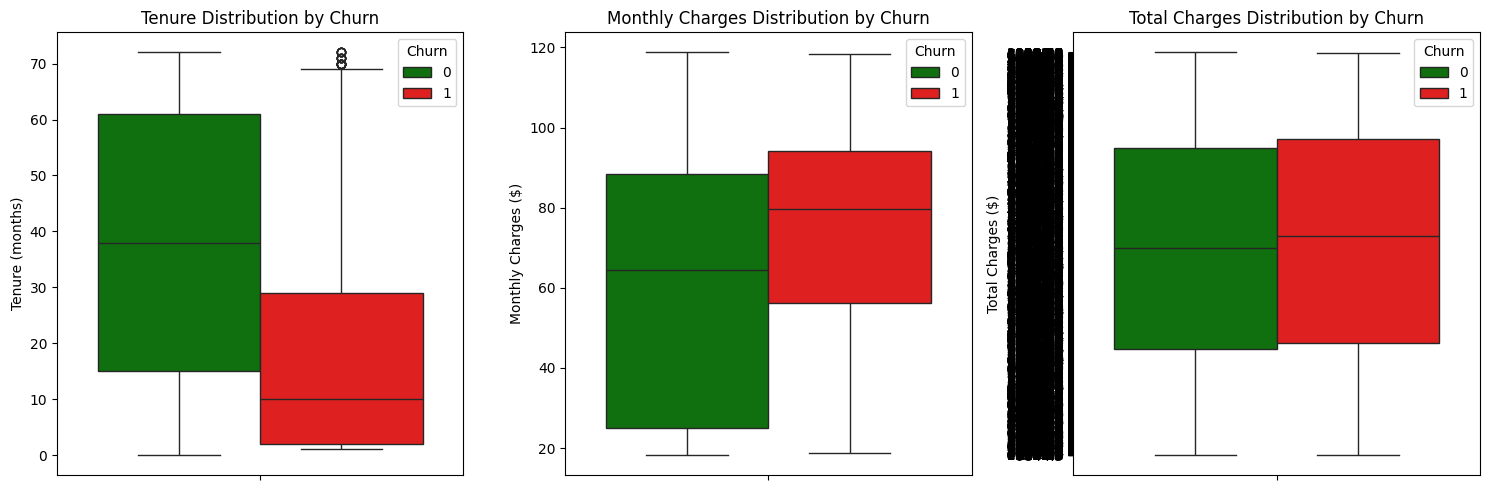

In [11]:
# Distribution plots for key metrics
plt.figure(figsize=(15, 5))

# Tenure Distribution
plt.subplot(1, 3, 1)
sns.boxplot(data=data, y='tenure', hue='Churn', palette=['green', 'red'])
plt.title('Tenure Distribution by Churn')
plt.ylabel('Tenure (months)')

# Monthly Charges Distribution
plt.subplot(1, 3, 2)
sns.boxplot(data=data, y='MonthlyCharges', hue='Churn', palette=['green', 'red'])
plt.title('Monthly Charges Distribution by Churn')
plt.ylabel('Monthly Charges ($)')

# Total Charges Distribution
plt.subplot(1, 3, 3)
sns.boxplot(data=data, y='TotalCharges', hue='Churn', palette=['green', 'red'])
plt.title('Total Charges Distribution by Churn')
plt.ylabel('Total Charges ($)')

plt.tight_layout()
plt.show()

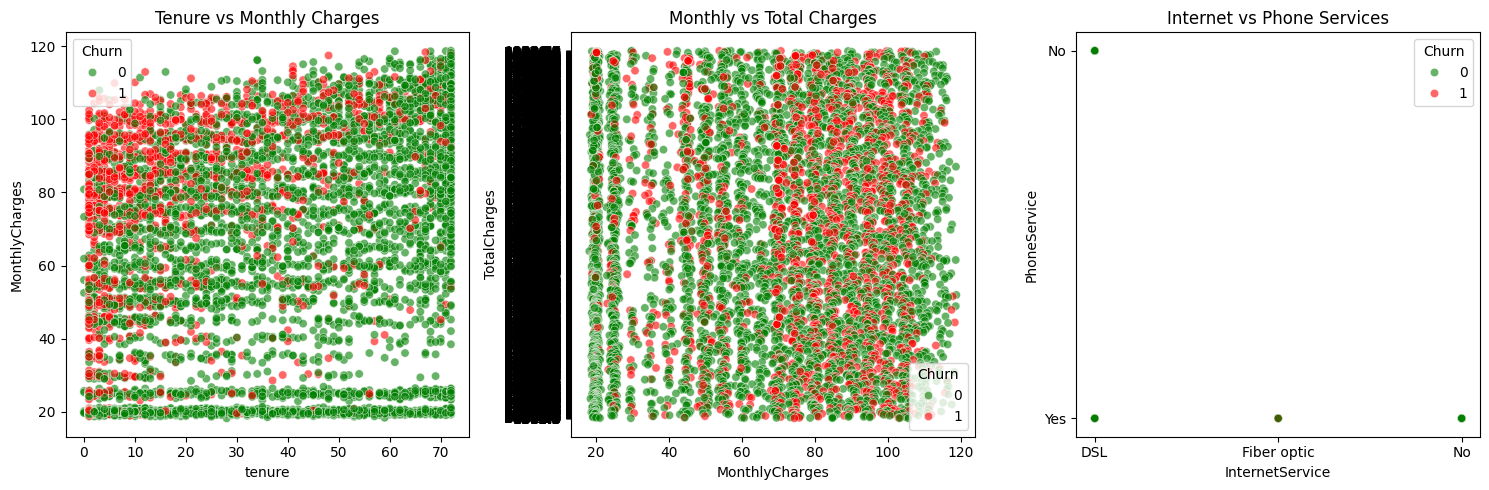

In [12]:
plt.figure(figsize=(15, 5))

# Customer Tenure vs Monthly Charges
plt.subplot(1, 3, 1)
sns.scatterplot(data=data,
                x='tenure',
                y='MonthlyCharges',
                hue='Churn',
                palette=['green', 'red'],
                alpha=0.6)
plt.title('Tenure vs Monthly Charges')

# Monthly vs Total Charges
plt.subplot(1, 3, 2)
sns.scatterplot(data=data,
                x='MonthlyCharges',
                y='TotalCharges',
                hue='Churn',
                palette=['green', 'red'],
                alpha=0.6)
plt.title('Monthly vs Total Charges')

# Internet vs Phone Services
plt.subplot(1, 3, 3)
sns.scatterplot(data=data,
                x='InternetService',
                y='PhoneService',
                hue='Churn',
                palette=['green', 'red'],
                alpha=0.6)
plt.title('Internet vs Phone Services')

plt.tight_layout()
plt.show()

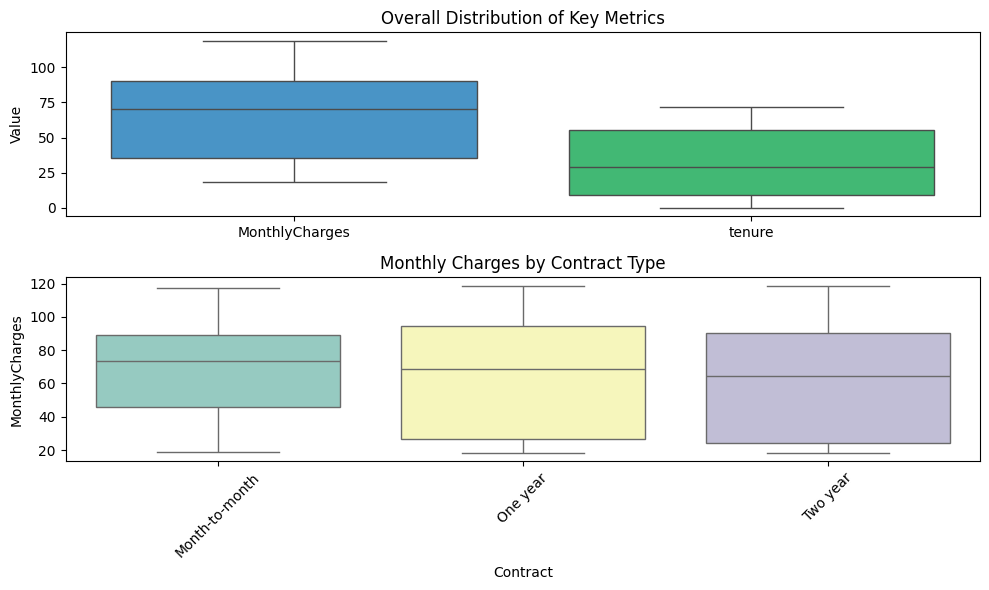

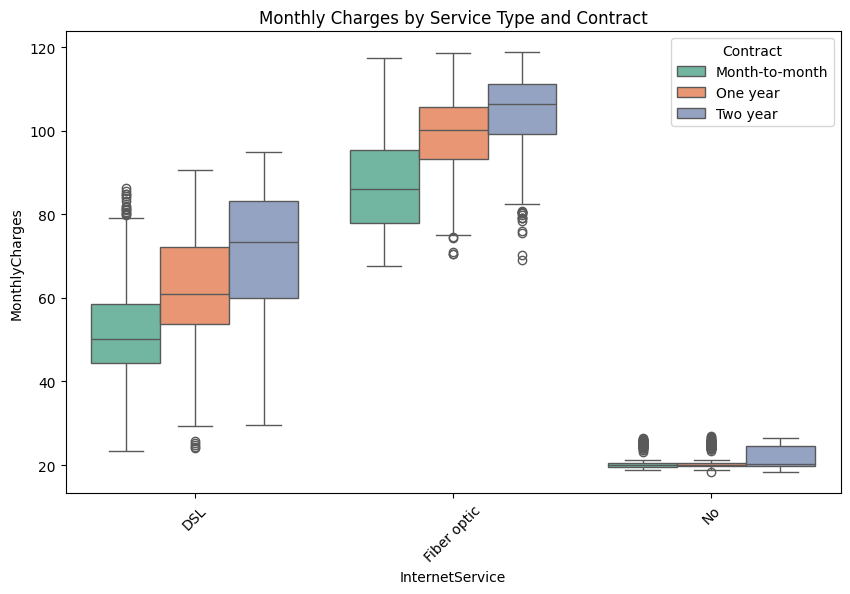

In [14]:
# Key metrics variations across customer segments
plt.figure(figsize=(10, 6))

# First plot: Overall metrics distribution
plt.subplot(2, 1, 1)
sns.boxplot(data=data[['MonthlyCharges', 'tenure', 'TotalCharges']],
            palette=['#3498db', '#2ecc71', '#e74c3c'])
plt.title('Overall Distribution of Key Metrics')
plt.ylabel('Value')

# Second plot: Metrics by different segments
plt.subplot(2, 1, 2)
sns.boxplot(data=data,
            x='Contract',
            y='MonthlyCharges',
            palette='Set3')
plt.title('Monthly Charges by Contract Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Alternative visualization for churn analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=data,
            x='InternetService',
            y='MonthlyCharges',
            hue='Contract',
            palette='Set2')
plt.title('Monthly Charges by Service Type and Contract')
plt.xticks(rotation=45)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Create copy of dataframe
df_model = data.copy()

# Handle missing values
numeric_cols = df_model.select_dtypes(include=['float64', 'int64']).columns
df_model[numeric_cols] = df_model[numeric_cols].fillna(df_model[numeric_cols].mean())

# Encode categorical variables
le = LabelEncoder()
categorical_cols = df_model.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Split features and target
X = df_model.drop('Churn', axis=1)  # Churn is our target variable
y = df_model['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print summary
print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)
print("\nMissing values:", X_train_scaled.isnull().sum().sum())
print("Sample of processed data:\n", X_train_scaled.head())

Training set shape: (5634, 20)
Testing set shape: (1409, 20)

Missing values: 0
Sample of processed data:
    customerID    gender  SeniorCitizen   Partner  Dependents    tenure  \
0   -0.268964 -1.025166      -0.437749 -0.969579    1.532186 -0.465683   
1    0.387215 -1.025166      -0.437749 -0.969579   -0.652662  0.885537   
2   -0.407990  0.975452      -0.437749  1.031376   -0.652662 -1.284605   
3   -0.860562  0.975452      -0.437749 -0.969579   -0.652662 -1.161766   
4   -0.786612  0.975452      -0.437749 -0.969579    1.532186 -1.325551   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0      0.329573      -1.000537        -1.182347        1.410879     -1.038357   
1      0.329573       1.108339         0.174618       -0.915399      1.230004   
2     -3.034225       0.053901        -1.182347       -0.915399     -1.038357   
3      0.329573      -1.000537         0.174618       -0.915399     -1.038357   
4      0.329573       1.108339        -1.18

Churn Prediction Model Evaluation:

Logistic Regression:
CV accuracy: 0.8009 (+/- 0.0176)
Test accuracy: 0.8148
ROC AUC: 0.8606

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409


Random Forest:
CV accuracy: 0.7945 (+/- 0.0167)
Test accuracy: 0.7970
ROC AUC: 0.8389

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409


Gradient Boosting:
CV accuracy: 0.8001 (+/- 0.0154)
Test accuracy: 0.8091
ROC AUC:

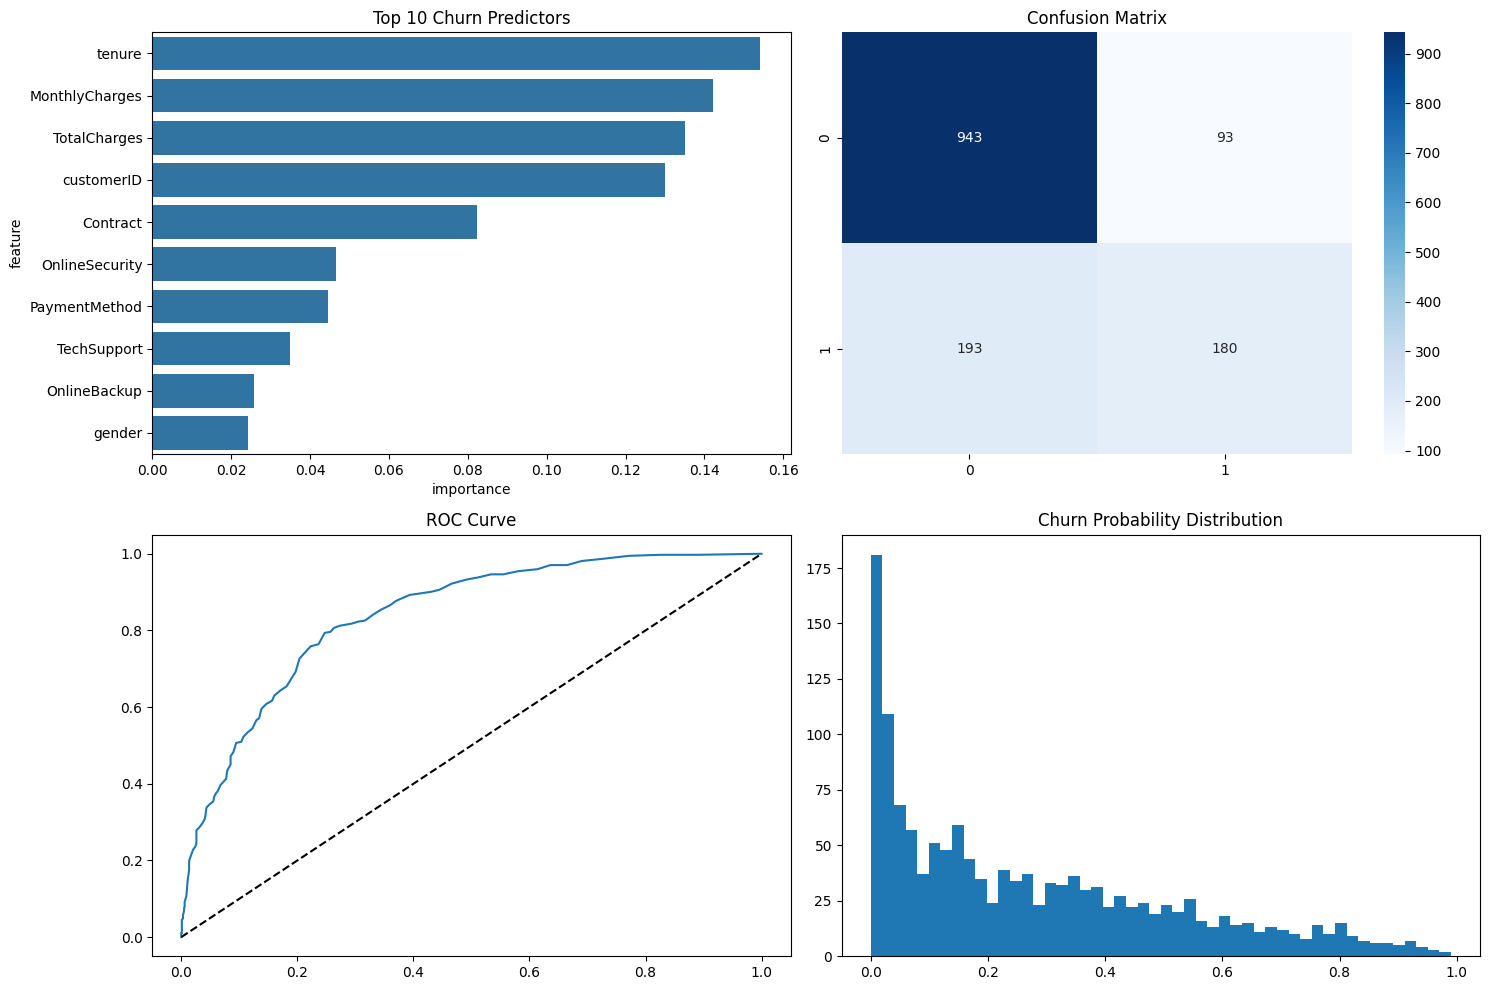

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Model evaluation
print("Churn Prediction Model Evaluation:")
for name, model in models.items():
    # Cross-validation and training
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

    # Print metrics
    print(f'\n{name}:')
    print(f'CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})')
    print(f'Test accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

# Feature importance (Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Visualizations
plt.figure(figsize=(15, 10))

# 1. Feature Importance
plt.subplot(2, 2, 1)
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Churn Predictors')

# 2. Confusion Matrix
plt.subplot(2, 2, 2)
cm = confusion_matrix(y_test, rf_model.predict(X_test_scaled))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

# 3. ROC Curve
plt.subplot(2, 2, 3)
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')

# 4. Prediction Probability Distribution
plt.subplot(2, 2, 4)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
plt.hist(y_prob, bins=50)
plt.title('Churn Probability Distribution')

plt.tight_layout()
plt.show()


Logistic Regression Results:
Training Accuracy: 0.8030
Testing Accuracy: 0.8148
Training ROC AUC: 0.8414
Testing ROC AUC: 0.8606

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409


Random Forest Results:
Training Accuracy: 0.9998
Testing Accuracy: 0.7970
Training ROC AUC: 1.0000
Testing ROC AUC: 0.8389

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409


Gradient Boosting Results:
Training Accurac

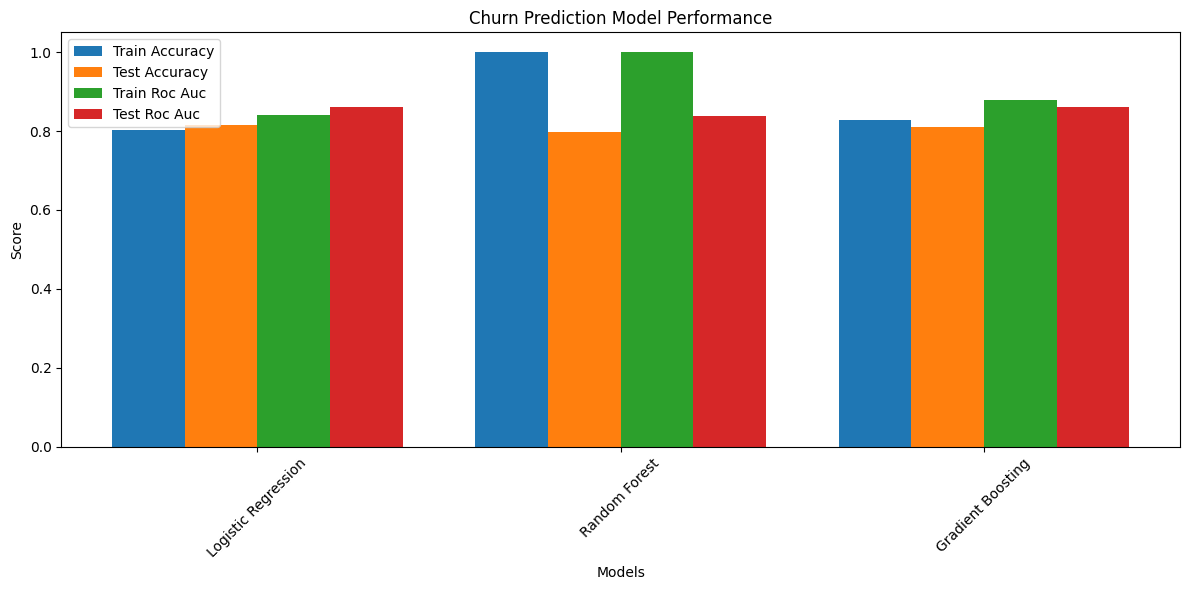

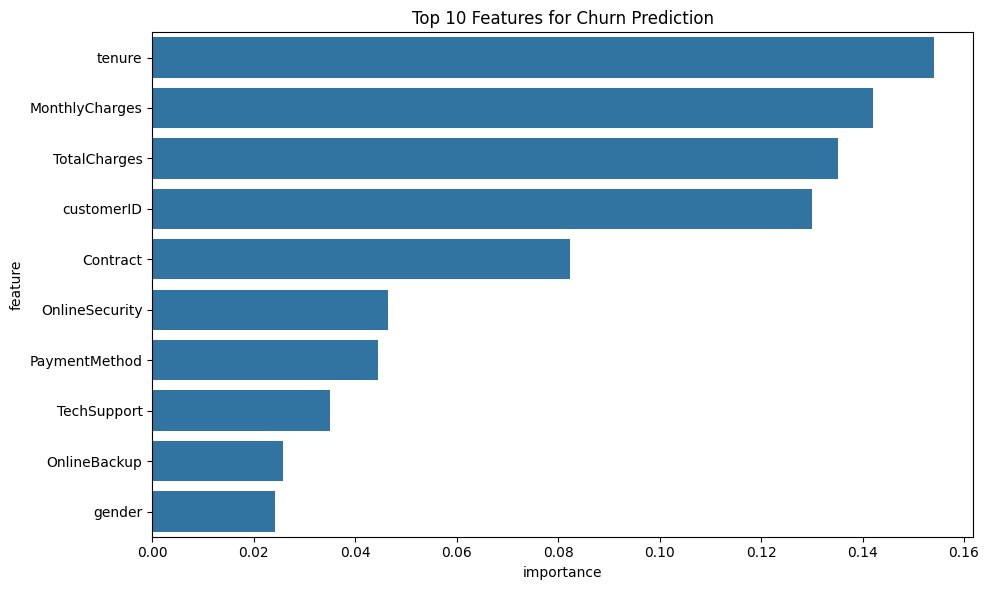


Best Model: Logistic Regression
Test ROC AUC: 0.8606


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Fit model
    model.fit(X_train_scaled, y_train)

    # Predictions
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    train_proba = model.predict_proba(X_train_scaled)[:, 1]
    test_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Store results
    results[name] = {
        'train_accuracy': accuracy_score(y_train, train_pred),
        'test_accuracy': accuracy_score(y_test, test_pred),
        'train_roc_auc': roc_auc_score(y_train, train_proba),
        'test_roc_auc': roc_auc_score(y_test, test_proba)
    }

    # Print results
    print(f'\n{name} Results:')
    print(f'Training Accuracy: {results[name]["train_accuracy"]:.4f}')
    print(f'Testing Accuracy: {results[name]["test_accuracy"]:.4f}')
    print(f'Training ROC AUC: {results[name]["train_roc_auc"]:.4f}')
    print(f'Testing ROC AUC: {results[name]["test_roc_auc"]:.4f}')
    print('\nClassification Report:')
    print(classification_report(y_test, test_pred))

# Visualization
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
metrics = ['train_accuracy', 'test_accuracy', 'train_roc_auc', 'test_roc_auc']
x = np.arange(len(model_names))
width = 0.2

for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in model_names]
    plt.bar(x + width*(i-1.5), values, width, label=metric.replace('_', ' ').title())

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Churn Prediction Model Performance')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance (Random Forest)
rf_model = models['Random Forest']
importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance.head(10))
plt.title('Top 10 Features for Churn Prediction')
plt.tight_layout()
plt.show()

# Print best model
best_model = max(results, key=lambda x: results[x]['test_roc_auc'])
print(f"\nBest Model: {best_model}")
print(f"Test ROC AUC: {results[best_model]['test_roc_auc']:.4f}")

Running Quick Grid Search...
Fitting 3 folds for each of 2 candidates, totalling 6 fits

Test Accuracy: 0.7885
Test ROC AUC: 0.8612

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1036
           1       0.58      0.75      0.65       373

    accuracy                           0.79      1409
   macro avg       0.74      0.78      0.75      1409
weighted avg       0.81      0.79      0.80      1409



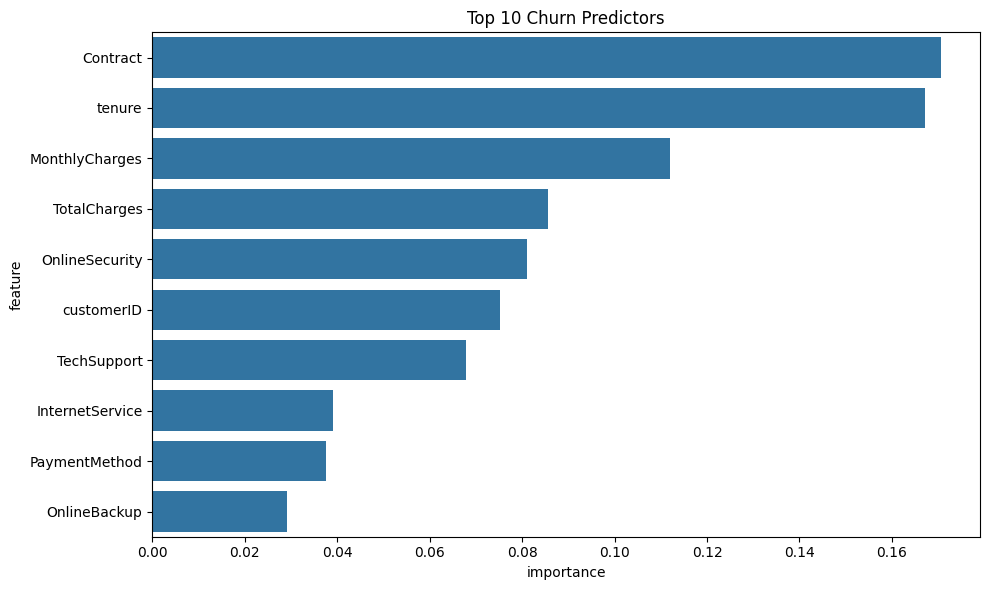

In [19]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Streamlined Random Forest with focused parameter grid
rf_tune = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

# Reduced parameter grid for faster execution
param_grid = {
    'n_estimators': [200],          # Fixed number of trees
    'max_depth': [10, 20],          # Reduced depth options
    'min_samples_split': [5],       # Fixed split threshold
    'max_features': ['sqrt']        # Fixed feature selection method
}

# Efficient Grid Search
print("Running Quick Grid Search...")
grid_search = GridSearchCV(
    estimator=rf_tune,
    param_grid=param_grid,
    cv=3,                          # Reduced cross-validation folds
    n_jobs=-1,
    scoring='roc_auc',
    verbose=1
)

# Fit model
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# Quick evaluation function
def quick_evaluate(model, X_train, X_test, y_train, y_test):
    # Get predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Print key metrics
    print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Test ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate and visualize
quick_evaluate(best_model, X_train_scaled, X_test_scaled, y_train, y_test)

# Quick feature importance plot
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).nlargest(10, 'importance')

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x='importance', y='feature')
plt.title('Top 10 Churn Predictors')
plt.tight_layout()
plt.show()

In [20]:
# Import required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define Random Forest model for churn prediction
rf_tune = RandomForestClassifier(random_state=42)

# Define parameter grid for churn model
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees
    'max_depth': [5, 10, 15],             # Maximum depth of trees
    'min_samples_split': [2, 5, 10],      # Minimum samples for split
    'min_samples_leaf': [1, 2, 4],        # Minimum samples in leaf
    'max_features': ['sqrt', 'log2']       # Feature selection method
}

# Additional parameters specific to churn prediction
rf_tune.set_params(
    class_weight='balanced',    # Handle imbalanced churn data
    n_jobs=-1                  # Use all available cores
)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [21]:
# Get predictions and probabilities
train_predictions = best_model.predict(X_train_scaled)
test_predictions = best_model.predict(X_test_scaled)
train_proba = best_model.predict_proba(X_train_scaled)[:, 1]
test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Print comprehensive metrics
print("\nChurn Model Performance Metrics:")
print("\nTraining Performance:")
print(f"Accuracy: {accuracy_score(y_train, train_predictions):.4f}")
print(f"ROC AUC: {roc_auc_score(y_train, train_proba):.4f}")
print("\nTraining Classification Report:")
print(classification_report(y_train, train_predictions))

print("\nTesting Performance:")
print(f"Accuracy: {accuracy_score(y_test, test_predictions):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, test_proba):.4f}")
print("\nTesting Classification Report:")
print(classification_report(y_test, test_predictions))

# Additional churn-specific metrics
print("\nChurn-Specific Insights:")
print(f"Churn Rate in Training: {(y_train==1).mean():.2%}")
print(f"Churn Rate in Testing: {(y_test==1).mean():.2%}")
print(f"Predicted Churn Rate: {(test_predictions==1).mean():.2%}")


Churn Model Performance Metrics:

Training Performance:
Accuracy: 0.8750
ROC AUC: 0.9519

Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      4138
           1       0.70      0.92      0.80      1496

    accuracy                           0.88      5634
   macro avg       0.83      0.89      0.85      5634
weighted avg       0.90      0.88      0.88      5634


Testing Performance:
Accuracy: 0.7885
ROC AUC: 0.8612

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1036
           1       0.58      0.75      0.65       373

    accuracy                           0.79      1409
   macro avg       0.74      0.78      0.75      1409
weighted avg       0.81      0.79      0.80      1409


Churn-Specific Insights:
Churn Rate in Training: 26.55%
Churn Rate in Testing: 26.47%
Predicted Churn Rate: 34.28%


In [22]:
# Cross-validation with multiple metrics
from sklearn.model_selection import cross_val_score

# ROC AUC cross-validation
roc_scores = cross_val_score(best_model,
                            X_train_scaled,
                            y_train,
                            cv=5,
                            scoring='roc_auc')

# Accuracy cross-validation
acc_scores = cross_val_score(best_model,
                            X_train_scaled,
                            y_train,
                            cv=5,
                            scoring='accuracy')

# Print comprehensive CV results
print("\nCross-validation Results for Churn Prediction:")
print("\nROC AUC Scores:")
print(f"Individual scores: {roc_scores.round(4)}")
print(f"Mean ROC AUC: {roc_scores.mean():.4f} (±{roc_scores.std()*2:.4f})")

print("\nAccuracy Scores:")
print(f"Individual scores: {acc_scores.round(4)}")
print(f"Mean Accuracy: {acc_scores.mean():.4f} (±{acc_scores.std()*2:.4f})")


Cross-validation Results for Churn Prediction:

ROC AUC Scores:
Individual scores: [0.8567 0.8384 0.8332 0.8266 0.8392]
Mean ROC AUC: 0.8388 (±0.0200)

Accuracy Scores:
Individual scores: [0.7746 0.7897 0.7755 0.7675 0.7771]
Mean Accuracy: 0.7769 (±0.0144)


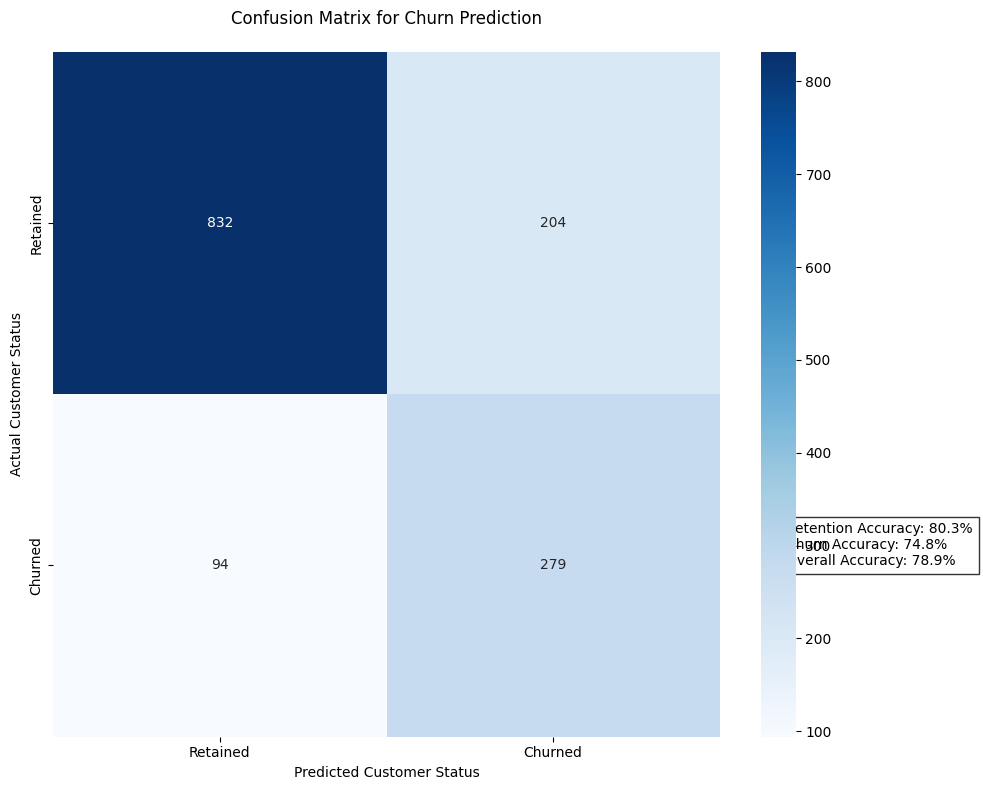

In [23]:
# Plot confusion matrix for churn prediction
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Plot with improved styling
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Retained', 'Churned'],
            yticklabels=['Retained', 'Churned'])

plt.title('Confusion Matrix for Churn Prediction', pad=20)
plt.ylabel('Actual Customer Status')
plt.xlabel('Predicted Customer Status')

# Add text annotations for additional metrics
tn, fp, fn, tp = cm.ravel()
total = np.sum(cm)

# Calculate metrics
retention_accuracy = (tn/(tn+fp))*100
churn_accuracy = (tp/(tp+fn))*100
overall_accuracy = ((tn+tp)/total)*100

# Add text box with metrics
plt.text(2.2, 1.5,
         f'Retention Accuracy: {retention_accuracy:.1f}%\n'
         f'Churn Accuracy: {churn_accuracy:.1f}%\n'
         f'Overall Accuracy: {overall_accuracy:.1f}%',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


Top 10 Most Important Features for Churn Prediction:
        feature  importance
       Contract    0.170523
         tenure    0.167146
 MonthlyCharges    0.111969
   TotalCharges    0.085501
 OnlineSecurity    0.081032
     customerID    0.075277
    TechSupport    0.067792
InternetService    0.039135
  PaymentMethod    0.037477
   OnlineBackup    0.029076


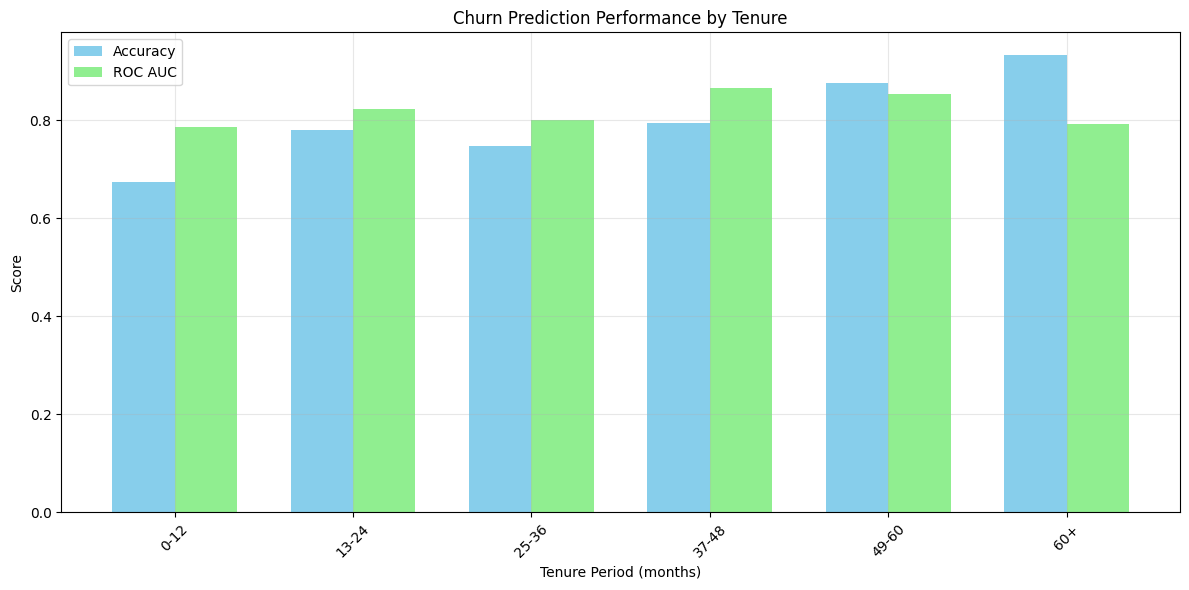


Performance by Tenure Period:
Tenure     Accuracy    ROC AUC
-----------------------------------
0-12       0.6742    0.7852
13-24      0.7799    0.8222
25-36      0.7483    0.8003
37-48      0.7941    0.8661
49-60      0.8765    0.8530
60+        0.9327    0.7917

Overall Churn Model Performance:
Average Accuracy: 0.7885
Average ROC AUC: 0.8612


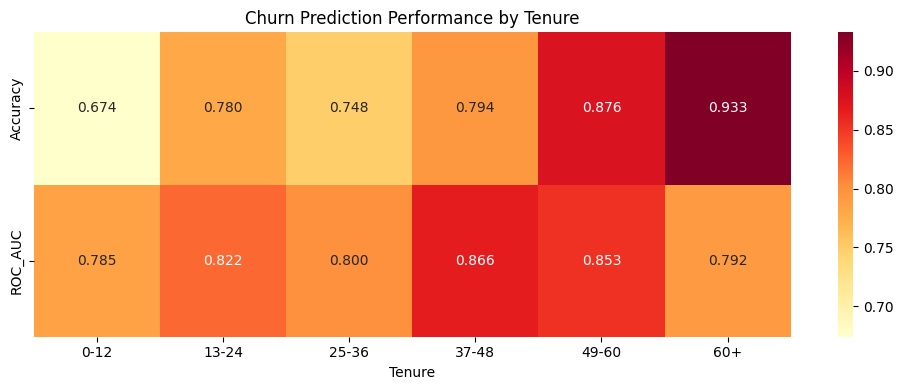

In [24]:
import calendar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Print feature importance
print('\nTop 10 Most Important Features for Churn Prediction:')
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance.head(10).to_string(index=False))

# Temporal analysis (if contract duration is available)
if 'tenure' in data.columns:
    # Create tenure groups
    tenure_bins = [0, 12, 24, 36, 48, 60, np.inf]
    tenure_labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '60+']
    test_data = X_test.copy()
    test_data['tenure_group'] = pd.cut(test_data['tenure'], bins=tenure_bins, labels=tenure_labels)

    # Calculate performance by tenure group
    tenure_performance = []
    for group in tenure_labels:
        group_mask = test_data['tenure_group'] == group
        if sum(group_mask) > 0:
            group_acc = accuracy_score(y_test[group_mask], test_predictions[group_mask])
            group_auc = roc_auc_score(y_test[group_mask], test_proba[group_mask])
            tenure_performance.append((group, group_acc, group_auc))

    # Plot tenure-based performance
    plt.figure(figsize=(12, 6))
    groups = [x[0] for x in tenure_performance]
    accuracies = [x[1] for x in tenure_performance]
    aucs = [x[2] for x in tenure_performance]

    x = np.arange(len(groups))
    width = 0.35

    plt.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
    plt.bar(x + width/2, aucs, width, label='ROC AUC', color='lightgreen')

    plt.xlabel('Tenure Period (months)')
    plt.ylabel('Score')
    plt.title('Churn Prediction Performance by Tenure')
    plt.xticks(x, groups, rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print performance by tenure
    print('\nPerformance by Tenure Period:')
    print('Tenure     Accuracy    ROC AUC')
    print('-' * 35)
    for group, acc, auc in tenure_performance:
        print(f'{group:<10} {acc:.4f}    {auc:.4f}')

# Overall performance summary
print('\nOverall Churn Model Performance:')
print(f'Average Accuracy: {accuracy_score(y_test, test_predictions):.4f}')
print(f'Average ROC AUC: {roc_auc_score(y_test, test_proba):.4f}')

# Performance heatmap by customer segments
plt.figure(figsize=(10, 4))
tenure_data = pd.DataFrame(tenure_performance,
                          columns=['Tenure', 'Accuracy', 'ROC_AUC'])
tenure_data = tenure_data.set_index('Tenure')

sns.heatmap(tenure_data.T, annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('Churn Prediction Performance by Tenure')
plt.tight_layout()
plt.show()

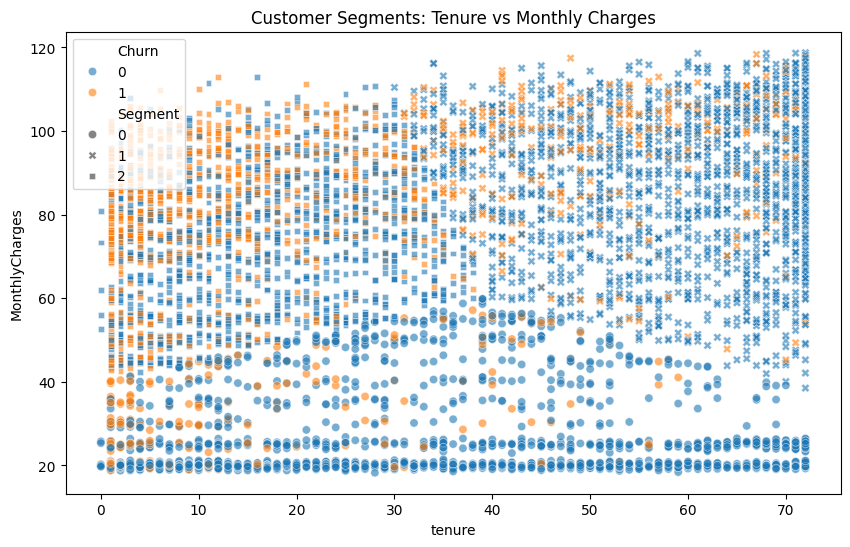

In [25]:
# Customer Segmentation Analysis
from sklearn.cluster import KMeans

# Create customer segments
X_segment = data[['tenure', 'MonthlyCharges']].copy()
X_segment_scaled = StandardScaler().fit_transform(X_segment)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Segment'] = kmeans.fit_predict(X_segment_scaled)

# Visualize segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges',
                hue='Churn', style='Segment', alpha=0.6)
plt.title('Customer Segments: Tenure vs Monthly Charges')
plt.show()

In [26]:
# Economic Impact Analysis
avg_monthly_charge = data['MonthlyCharges'].mean()
churn_probability = best_model.predict_proba(X_test_scaled)[:, 1]
potential_monthly_loss = avg_monthly_charge * churn_probability.sum()

print("\nEconomic Impact:")
print(f"Average Monthly Charge: ${avg_monthly_charge:.2f}")
print(f"Potential Monthly Revenue at Risk: ${potential_monthly_loss:.2f}")


Economic Impact:
Average Monthly Charge: $64.76
Potential Monthly Revenue at Risk: $33204.29


In [27]:
# High-Risk Customer Analysis
high_risk_threshold = 0.7
high_value_threshold = data['MonthlyCharges'].quantile(0.75)

high_risk = (churn_probability > high_risk_threshold)
high_value = (X_test['MonthlyCharges'] > high_value_threshold)
priority_customers = sum(high_risk & high_value)

print("\nHigh-Risk Analysis:")
print(f"Number of High-Risk, High-Value Customers: {priority_customers}")
print(f"High-Value Customer Threshold: ${high_value_threshold:.2f}")


High-Risk Analysis:
Number of High-Risk, High-Value Customers: 72
High-Value Customer Threshold: $89.85


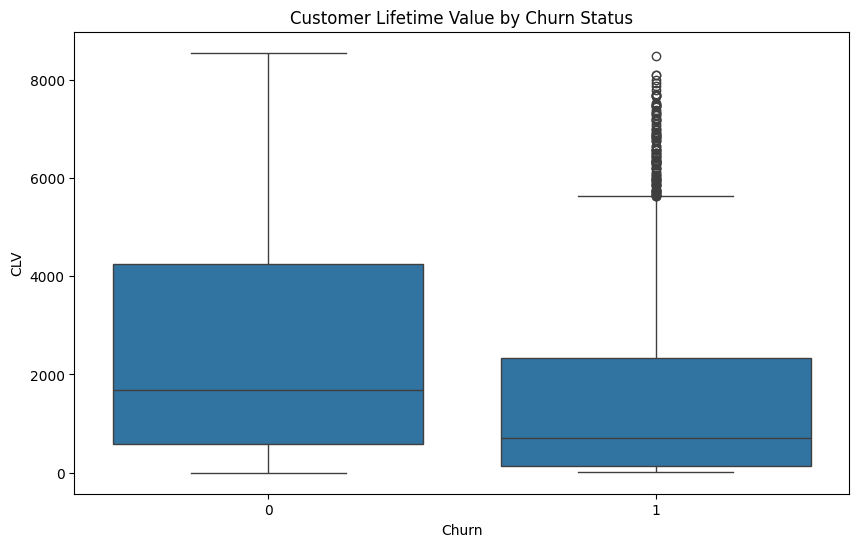

In [28]:
# Customer Lifetime Value (CLV) Analysis
data['CLV'] = data['tenure'] * data['MonthlyCharges']

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='CLV')
plt.title('Customer Lifetime Value by Churn Status')
plt.show()

In [29]:
# Business Recommendations
print("\nBusiness Recommendations:")
print("\n1. Priority Customer Segments:")
print(f"   - High-value customers (>${high_value_threshold:.2f} monthly)")
print(f"   - New customers (<{data['tenure'].quantile(0.25):.0f} months)")

print("\n2. Key Areas for Service Improvement:")
for feature, importance in feature_importance.head(5).values:
    print(f"   - {feature}: Impact Score = {importance:.3f}")

print("\n3. Retention Strategies:")
print("   - Develop targeted retention programs for high-risk segments")
print("   - Focus on early tenure customer engagement")
print("   - Consider contract type adjustments")
print("   - Implement proactive customer service for high-value customers")


Business Recommendations:

1. Priority Customer Segments:
   - High-value customers (>$89.85 monthly)
   - New customers (<9 months)

2. Key Areas for Service Improvement:
   - Contract: Impact Score = 0.171
   - tenure: Impact Score = 0.167
   - MonthlyCharges: Impact Score = 0.112
   - TotalCharges: Impact Score = 0.086
   - OnlineSecurity: Impact Score = 0.081

3. Retention Strategies:
   - Develop targeted retention programs for high-risk segments
   - Focus on early tenure customer engagement
   - Consider contract type adjustments
   - Implement proactive customer service for high-value customers


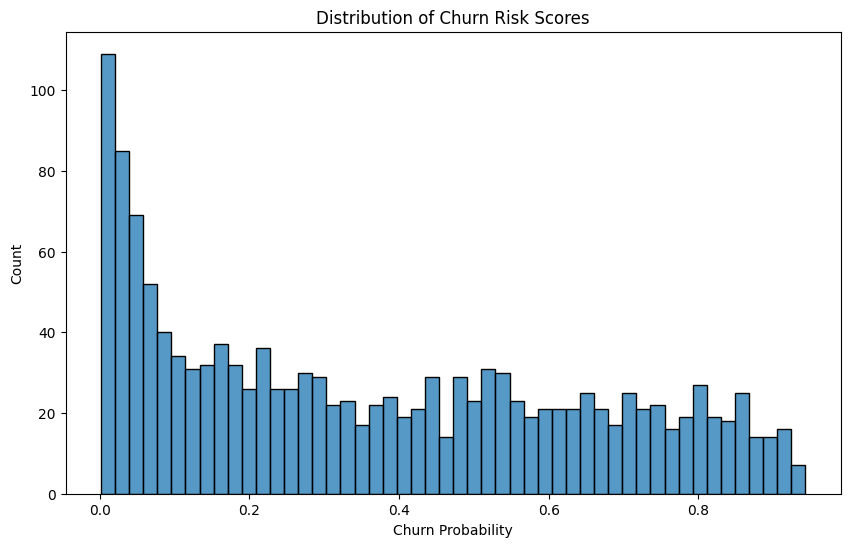

In [30]:
# Churn Risk Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(churn_probability, bins=50)
plt.title('Distribution of Churn Risk Scores')
plt.xlabel('Churn Probability')
plt.ylabel('Count')
plt.show()